# Lab 4 - Hypothesis testing and statistical analysis

Please read this to the end before starting. There is important information towards the end.

## Get the data (1 mark)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS 


ModuleNotFoundError: No module named 'matplotlib'

In [59]:
df = pd.read_csv("census11sample.csv", index_col=0)
df

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,27,32,65,60,44,79,43,8,9
1,10,36,40,19,52,46,58,87,40
2,82,53,60,34,2,29,18,46,57
3,33,63,25,60,9,26,30,52,74
4,55,98,4,47,58,37,18,67,19
...,...,...,...,...,...,...,...,...,...
995,42,59,47,37,61,67,29,16,21
996,49,45,16,80,87,86,4,79,74
997,31,5,25,39,52,22,17,8,34
998,38,69,52,4,3,76,24,51,94


The data is called `census11sample.csv`. It is on Blackboard. Read it in to a dataframe.
This data consists of samples of ages from the 2011 census in England for different regions. Each data point is the age at the last birthday of an individual. So, a zero is a person who has not reached their first birthday, a 35 is a person who is 35 years old, and so on. The exception is that the age 100 really means between 100 and 114. Apparently, the Office for National Statistics filtered out everyone over 114. There is a sample of 1000 individual ages for each of nine regions. The data is *derived from* the Office for National Statistics: 2011 Census aggregate data. UK Data Service (Edition: February 2017). DOI: http://dx.doi.org/10.5257/census/aggregate-2011-2, but was taken from the InFuse website, http://infuse2011.ukdataservice.ac.uk. You will not find the data we are using there, however. These samples were created from this data by Jonathan Shapiro.

## Divide the data (2 marks)

## Splitting the data into explore and test
Proportion is 60% explore 40% test <br>
The following code randomly splits the original data into testing and exploring by randomly choosing
the proportion it was run the first time now

```python
df_explore = df.sample(frac=0.6, random_state=1)
df_test = df.drop(df_explore.index)
df_test = df_test.reset_index()
df_test = df_test.drop(columns=["index"])
df_explore = df_explore.reset_index()
df_explore = df_explore.drop(columns=["index"])
```

In [60]:
df_copy = df.copy()
df_explore = df.sample(frac=0.6, random_state=0)
df_test = df.drop(df_explore.index)
df_test = df_test.reset_index()
df_test = df_test.drop(columns=["index"])
df_explore = df_explore.reset_index()
df_explore = df_explore.drop(columns=["index"])

## Saving split data into files

``` python
df_test.to_csv("test.csv")
df_explore.to_csv("explore.csv")
```

## Exploring data

In [61]:
df_explore = pd.read_csv("explore.csv", index_col=0)
df_explore

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,83,10,60,36,68,41,56,15,45
1,0,8,1,11,81,38,72,42,23
2,45,46,50,39,81,44,47,15,40
3,55,76,4,90,33,81,61,8,79
4,17,64,42,34,72,38,43,49,68
...,...,...,...,...,...,...,...,...,...
595,10,70,20,23,48,26,15,38,45
596,50,82,48,10,81,72,63,52,31
597,69,46,83,33,60,58,23,1,40
598,38,60,56,50,56,31,3,36,14


## Testing data

In [62]:
df_test = pd.read_csv("test.csv", index_col=0)
df_test

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,10,36,40,19,52,46,58,87,40
1,62,44,41,76,8,74,54,40,72
2,51,55,53,64,15,48,35,60,61
3,40,36,58,62,82,40,20,33,84
4,46,16,23,7,27,60,63,67,19
...,...,...,...,...,...,...,...,...,...
395,12,7,49,89,53,43,55,27,13
396,26,35,43,52,0,30,44,15,55
397,37,59,29,83,40,7,5,65,95
398,38,69,52,4,3,76,24,51,94


## Explore the data (5 marks)

In [63]:
general_info  = df_explore.describe()
general_info

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,40.596667,39.053333,39.253333,39.625000,40.350000,41.506667,36.443333,39.978333,43.291667
std,23.126147,23.415543,22.760255,23.304639,23.707543,23.345055,21.931449,23.383738,24.346962
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,19.000000,20.000000,20.000000,19.000000,22.750000,20.000000,20.000000,22.000000
50%,41.000000,39.000000,39.000000,38.000000,41.000000,41.000000,35.000000,40.000000,44.000000
75%,58.000000,57.250000,56.000000,58.250000,58.250000,61.000000,52.000000,59.000000,62.000000
max,94.000000,98.000000,100.000000,95.000000,96.000000,97.000000,92.000000,95.000000,98.000000


In [64]:
general_info.loc["mean"].max()

43.291666666666664

The south west has the highest mean age

## The national mean age of all the regions

In [65]:
np.mean(df_explore.values)

40.010925925925925

## Split the ages into three groups
- Under working group below 16
- Working group [16 - 65]
- Retirement age  above 65

## Under 16
### Entities of the data
- we can see the area with the lowest mean is North East

In [66]:
df_explore_describe = df_explore[df_explore < 16].describe()
df_explore_describe

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
count,102.000000,121.000000,110.000000,118.000000,113.000000,97.000000,121.000000,114.000000,97.000000
mean,7.323529,7.528926,7.881818,8.008475,7.442478,7.608247,7.041322,7.473684,8.402062
std,4.883112,4.863254,4.967291,4.426987,4.799438,4.727043,4.766894,4.466613,4.696319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,4.000000,4.250000,3.000000,4.000000,3.000000,3.000000,5.000000
50%,7.000000,8.000000,7.500000,9.000000,7.000000,7.000000,7.000000,8.000000,8.000000
75%,11.000000,12.000000,13.000000,12.000000,12.000000,12.000000,11.000000,11.000000,13.000000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000


In [67]:
np.min(df_explore_describe.loc['mean'])

7.041322314049586

In [68]:
# np_array
df_under16 = df_explore[df_explore < 16].count().to_frame()
df_under16 = df_under16.reset_index()
df_under16 = df_under16.rename(columns={"index": "Area", 0:"Count"})
df_under16

,Area,Count
0,North East,102
1,North West,121
2,Yorkshire and The Humber,110
3,East Midlands,118
4,West Midlands,113
5,East of England,97
6,London,121
7,South East,114
8,South West,97


In [69]:
(np.max(df_under16["Count"])/np.sum(df_under16["Count"])) * 100

12.185297079556898

London Counts for 14% of the people under 16

## Plot

[]

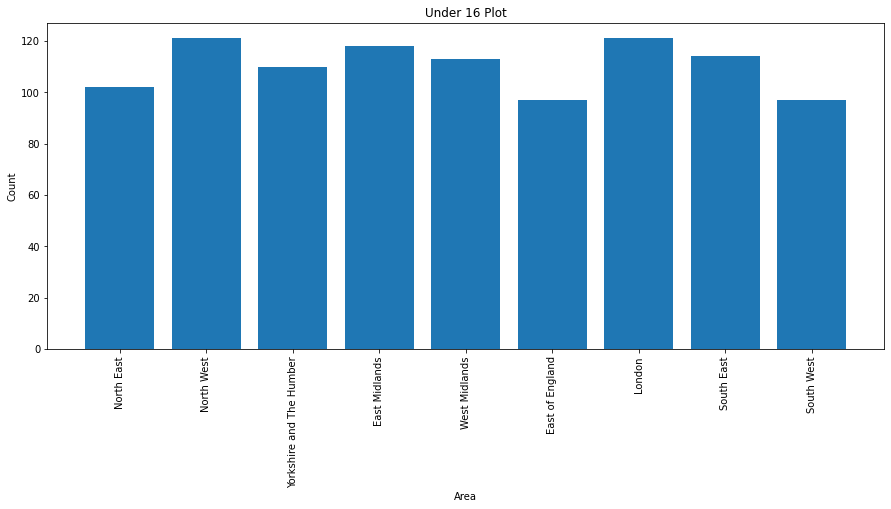

In [70]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title("Under 16 Plot")
plt.bar(df_under16["Area"], df_under16["Count"])
plt.xticks(rotation='vertical')
plt.xlabel('Area')
plt.ylabel('Count')
plt.plot()

## 16 - 65 Working age

In [71]:
df_explore[(df_explore >= 16) & (df_explore <65)].describe()

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
count,396.000000,389.000000,395.000000,380.000000,385.000000,383.000000,405.000000,380.000000,370.000000
mean,40.229798,40.365039,39.483544,39.986842,40.688312,39.574413,38.143210,40.052632,40.332432
std,13.966695,14.121725,13.771950,13.884649,14.384290,13.259752,12.550856,13.731399,13.954835
min,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
25%,28.000000,28.000000,27.000000,28.750000,28.000000,30.000000,28.000000,28.000000,28.000000
50%,41.000000,41.000000,40.000000,39.000000,42.000000,40.000000,37.000000,40.000000,41.500000
75%,52.000000,53.000000,51.000000,51.000000,53.000000,49.000000,48.000000,51.000000,52.000000
max,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000


In [72]:
df_working_age = df_explore[(df_explore >= 16) & (df_explore <65)].count().to_frame()
df_working_age = df_working_age.reset_index()
df_working_age = df_working_age.rename(columns={"index": "Area", 0:"Count"})
df_working_age

,Area,Count
0,North East,396
1,North West,389
2,Yorkshire and The Humber,395
3,East Midlands,380
4,West Midlands,385
5,East of England,383
6,London,405
7,South East,380
8,South West,370


## Plot

[]

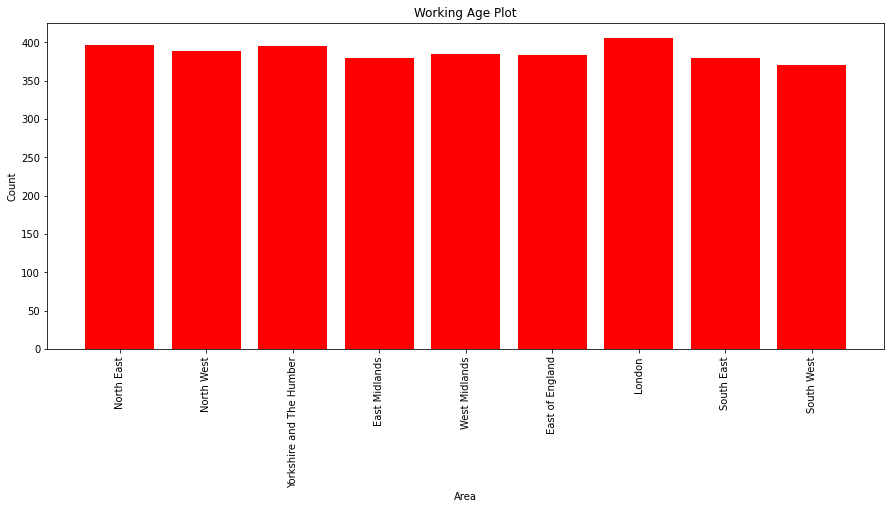

In [73]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title("Working Age Plot")
plt.bar(df_working_age['Area'], df_working_age["Count"], color="red", width=0.8, align='center')
plt.xticks(rotation='vertical')
plt.xlabel("Area")
plt.ylabel("Count")
plt.plot()

## Above 65 and including 65

In [74]:
df_explore[df_explore >= 65].describe()

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
count,102.000000,90.000000,95.000000,102.000000,102.000000,120.00000,74.000000,106.000000,133.000000
mean,75.294118,75.766667,74.621053,74.852941,75.529412,75.07500,75.216216,74.669811,76.969925
std,7.119334,8.199822,7.833614,7.296272,7.699435,8.71024,8.046560,7.430595,8.224078
min,65.000000,65.000000,65.000000,65.000000,65.000000,65.00000,65.000000,65.000000,65.000000
25%,69.250000,68.250000,68.000000,68.000000,69.000000,68.00000,68.250000,69.000000,70.000000
50%,75.000000,74.500000,73.000000,74.000000,74.500000,72.00000,73.500000,74.000000,76.000000
75%,80.000000,81.750000,80.000000,80.000000,81.000000,81.00000,81.000000,79.000000,83.000000
max,94.000000,98.000000,100.000000,95.000000,96.000000,97.00000,92.000000,95.000000,98.000000


In [75]:
df_retired = df_explore[df_explore >= 65].count().to_frame()
#df_retired = df_retired.reset_index()
df_retired = df_retired.rename(columns={"index": "Area",0:"Count"})
df_retired

,Count
North East,102
North West,90
Yorkshire and The Humber,95
East Midlands,102
West Midlands,102
East of England,120
London,74
South East,106
South West,133


## Plot

[]

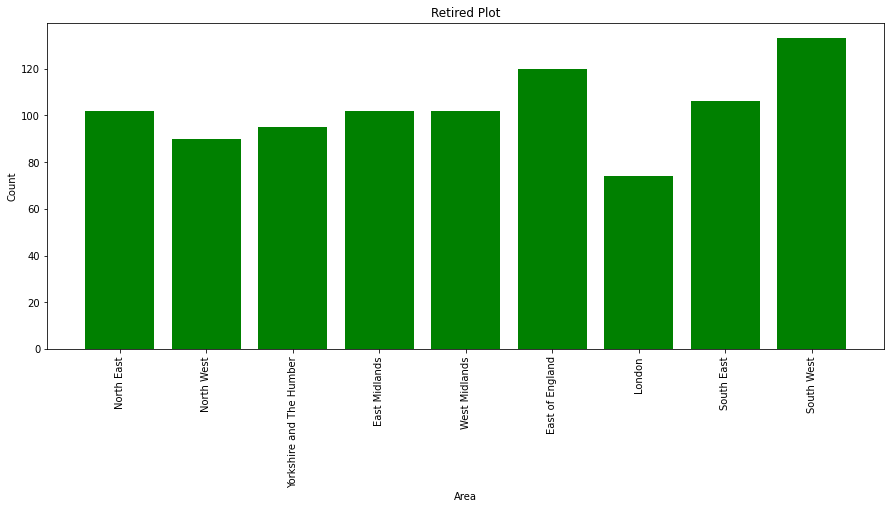

In [76]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title("Retired Plot")
plt.bar(df_retired.index, height=df_retired["Count"], color= "green")
plt.xticks(rotation='vertical')
plt.xlabel('Area')
plt.ylabel('Count')
plt.plot()

## Summary of all the Points

In [77]:
df_all_data = pd.DataFrame([df_explore[df_explore < 16].count(),
                            df_explore[(df_explore >= 16) & (df_explore <65)].count(),
                            df_explore[df_explore >= 65].count()])
df_all_data = df_all_data.transpose()
df_all_data = df_all_data.rename(columns={0:"Under 16", 1:"Working age", 2:"Retired"})
df_all_data.to_csv("all_data_split_by_working_age.csv")
df_all_data

,Under 16,Working age,Retired
North East,102,396,102
North West,121,389,90
Yorkshire and The Humber,110,395,95
East Midlands,118,380,102
West Midlands,113,385,102
East of England,97,383,120
London,121,405,74
South East,114,380,106
South West,97,370,133


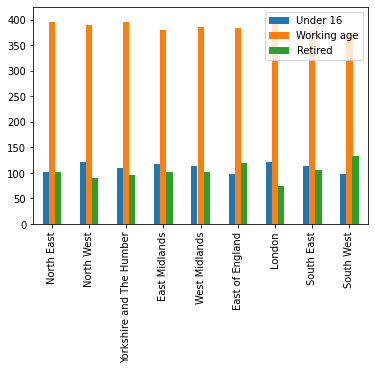

In [78]:
df_all_data.plot.bar()

## Combine the regions into larger regions
- North East, North West, Yorkshire and the Humber into North
- East Midlands, West Midlands into Midlands
- South East, South West and London into South
- East of England

In [79]:
north_ser = df_all_data.loc["North East"] +\
            df_all_data.loc["North West"] +\
            df_all_data.loc['Yorkshire and The Humber']
midland_ser = df_all_data.loc['East Midlands'] +\
              df_all_data.loc['West Midlands']
south_ser = df_all_data.loc['London'] +\
            df_all_data.loc['South East'] +\
            df_all_data.loc['South West']
east_ser = df_all_data.loc['East of England']
north_mid_south = [north_ser, midland_ser, south_ser, east_ser]
general_regions = pd.DataFrame(north_mid_south)
general_regions = general_regions.transpose().rename(columns={"Unnamed 0":"North",
                                            "Unnamed 1":"Midlands",
                                            "Unnamed 2":"South",
                                            "East of England":"East"})
general_regions

,North,Midlands,South,East
Under 16,333,231,332,97
Working age,1180,765,1155,383
Retired,287,204,313,120


---

## State your hypothesis, and state the evidence that justifies it. (2 marks)

### Null hypothesis: The South West is similar to most of the regions in England
- The differance is due to sampling not actual dfferance

### Alternate hypothesis: The South West region has the highest percentage people over 65 ( Retired)
#### Evidence to Support the Alternate
- Counts for the highest number of retired people

In [80]:
df_retired.idxmax()

Count    South West
dtype: object

- It Counts for 14.394%

In [81]:
(df_retired["Count"].max() / np.sum(df_retired["Count"])) * 100

14.393939393939394

- It has the highest mean of all regions:

In [82]:
general_info.loc["mean"].max()

43.291666666666664

---

## Plan the test. (3 marks)
- We test the data using Simulation
- calculate the senior difference between people over 65
- Pull random data from South West and each region individually ( pool data together)
- combined success probability
- using that rate
- generate two data
- compare the mean to the test probability
- the result will be an array of p-values of each region
- we compare the results and we see the regions that are similar to the South West
- alpha 0.05

---

## Perform the statistical test of the hypothesis. (5 marks)

In [83]:
from scipy.stats import bernoulli
sw_count = df_test['South West'][df_test['South West'] >= 65].count()
sw_percent = sw_count/400
regions_p_value = {}

for item in list(df_test.columns):
    if item != "South West":
        NTrials = 10000
        data_sample = 400
        data_sample2 = 400
        count = 0
        sample_count = df_test[item][df_test[item] >= 65].count()
        test = abs(sw_count - sample_count)
        ts = test/data_sample
        sample_percent = sample_count/data_sample2
        pool_prob = (sw_percent + sample_percent) /2
        for trial in range(NTrials):
            pool_result = bernoulli.rvs(pool_prob, size=data_sample)
            m1 = np.mean(pool_result)
            pool_result2 = bernoulli.rvs(pool_prob, size= data_sample2)
            m2 = np.mean(pool_result2)
            m = abs(m1 - m2)
            if m >= ts:
                count += 1
        regions_p_value[item] = count/NTrials
print(regions_p_value)

{'North East': 0.1094, 'North West': 0.0273, 'Yorkshire and The Humber': 0.0702, 'East Midlands': 0.092, 'West Midlands': 0.0856, 'East of England': 0.3187, 'London': 0.0005, 'South East': 0.1396}


In [85]:
regions_p_value_saved = {'North East': 0.1109, 'North West': 0.0246,
                         'Yorkshire and The Humber': 0.0739,
                         'East Midlands': 0.0912, 'West Midlands': 0.0889,
                         'East of England': 0.3155, 'London': 0.0003,
                         'South East': 0.1354}
p_average = 0
for i in regions_p_value_saved.values():
    p_average += i

print(p_average/8)

0.10508749999999999


In [89]:
for region, p in regions_p_value_saved.items():
    if p >= 0.05:
        print(region + " is not significantly different")
    else:
        print(region + " is significantly different")

North West is significantly different
London is significantly different


******

## Conclusions. (2 Marks)
**Using the simulation method**: <br>
The South west is not that different compared to other regions, we fail to reject the null hypothesis
at alpha 0.05 <br>
There is no majority of retired people in the region.
Two areas were different compared to South West
- London
- North West

---
difference compared to each region
- North East is not significantly different
- North West is significantly different
- Yorkshire and The Humber is not significantly different
- East Midlands is not significantly different
- West Midlands is not significantly different
- East of England is not significantly different
- London is significantly different
- South East is not significantly different

 ***

# The end!